# RQ2 Analysis | Anthony Hernandez | SI 305

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## RQ #2: *Which pipe materials demonstrate the highest cost efficiency and sustainability in Ann Arbor's water main infrastructure, considering factors such as maintenance costs and durability?*

### Data Cleaning of Watermain Breaks and Watermain Attributes data:

In [2]:
# read in Watermain Breaks dataset needed for analysis, dropped columns not applicable for analysis.
url_watermain_breaks = 'https://drive.google.com/file/d/1LTYIn0aq4gBmD65B508miLt8cSzfLom8/view?usp=sharing'
url_download_watermain_breaks ='https://drive.google.com/uc?export=download&id=' + url_watermain_breaks.split('/')[-2]
watermain_breaks_data = pd.read_csv(url_download_watermain_breaks)
watermain_breaks_data = watermain_breaks_data[['Work Order ID','Status','Actual Start','Actual Finish','Canceled','Expense Type','Total Cost','Labor Cost','Material Cost','Equipment Cost','Permit Cost']]


# used .info() to understand what types of data i am working with after column filter.
watermain_breaks_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966 entries, 0 to 965
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Work Order ID   966 non-null    int64  
 1   Status          966 non-null    object 
 2   Actual Start    475 non-null    object 
 3   Actual Finish   904 non-null    object 
 4   Canceled        966 non-null    object 
 5   Expense Type    966 non-null    object 
 6   Total Cost      966 non-null    float64
 7   Labor Cost      966 non-null    float64
 8   Material Cost   966 non-null    float64
 9   Equipment Cost  966 non-null    float64
 10  Permit Cost     966 non-null    int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 83.1+ KB


In [3]:
# read in Water Main Attributes dataset and selected columns of interest of analysis.
watermain_attributes_data = pd.read_csv('https://docs.google.com/spreadsheets/d/1pIrZNiLOfzLmbNErw2JdtS0X0exFCEPLYovPrTzEauk/gviz/tq?tqx=out:csv')
watermain_attributes_data = watermain_attributes_data.rename(columns={'WORKORDERI': 'Work Order ID'})
watermain_attributes_data = watermain_attributes_data[['FACILITYID','INSTALLDAT','MATERIAL','LENGTH','DIAMETER','DEPTH','STATUS','Work Order ID','INITIATE DATE']]

# used .info() to understand what types of data i am working with after filter.
watermain_attributes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876 entries, 0 to 875
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FACILITYID     876 non-null    object 
 1   INSTALLDAT     868 non-null    object 
 2   MATERIAL       876 non-null    object 
 3   LENGTH         876 non-null    float64
 4   DIAMETER       876 non-null    float64
 5   DEPTH          876 non-null    float64
 6   STATUS         876 non-null    object 
 7   Work Order ID  876 non-null    int64  
 8   INITIATE DATE  876 non-null    object 
dtypes: float64(3), int64(1), object(5)
memory usage: 61.7+ KB


In [4]:
# merged both datasets on Work order ID number
main_data = pd.merge(watermain_breaks_data, watermain_attributes_data, on='Work Order ID', how = 'inner')

In [5]:
# filtered main_data to pipes installed on or after 1/1/1950 because i am focusing on pipes installed after 1950
main_data['INSTALLDAT'] = pd.to_datetime(main_data['INSTALLDAT'])
main_data = main_data[main_data['INSTALLDAT'] >= pd.to_datetime('1950-01-01')]

In [6]:
# replaced NaN rows of 'Actual Start' with 'Actual Finish' data as directed in the data description
main_data['Actual Start'] = main_data['Actual Start'].fillna(main_data['Actual Finish'])

# converted actual start and finish dates to a datetime objects 
main_data['Actual Start'] = pd.to_datetime(main_data['Actual Start'])
main_data['Actual Finish'] = pd.to_datetime(main_data['Actual Finish'])

# dropped any remaining NaN rows in the 'Actual Start' or 'Actual finish' columns to ensure no NaN remain
main_data.dropna(subset=['Actual Start', 'Actual Finish'], how='all', inplace=True)

In [7]:
# created a year column to track what year watermain break occured
main_data['YEAR of WM Break'] = main_data['Actual Start'].dt.year

# created another year column to track what year the watermain was installed
main_data['YEAR Installed'] = main_data['INSTALLDAT'].dt.year

# calculated the age of each watermain at break and stored it in the Age column
main_data['Age'] = main_data['YEAR of WM Break'] - main_data['YEAR Installed']


In [8]:
# renamed all 'ST' values in MATERIAL to 'STL' since they are the same
main_data['MATERIAL'] = main_data['MATERIAL'].replace('ST', 'STL')

##### My research question only focuses on pipe materials and months of watermain break occurences. I want to look into the values within the "MATERIALS" column and "Age" to see how they correspond with my RQ.

In [9]:
# 'MATERIAL' column value count breakdown to get an understanding of which materials i am working with
main_data['MATERIAL'].value_counts().reset_index()

,index,MATERIAL
0,CI,408
1,DI,182
2,STL,2
3,HDPE,1
4,PVC,1
5,AC,1


##### Cleaned dataset (main_data):

In [10]:
# displayed a chunk of my dataset after filtering to show all the variables i will be working with in this RQ
main_data.head()

,Work Order ID,Status,Actual Start,Actual Finish,Canceled,Expense Type,Total Cost,Labor Cost,Material Cost,Equipment Cost,...,INSTALLDAT,MATERIAL,LENGTH,DIAMETER,DEPTH,STATUS,INITIATE DATE,YEAR of WM Break,YEAR Installed,Age
0,332757,CLOSED,2012-12-28,2012-12-28,N,MAINT,3217.02,950.58,438.90,1827.54,...,2006-04-11,DI,82.0,8.0,0.0,IS,1/2/2013 0:00,2012,2006,6
2,333296,CLOSED,2013-01-05,2013-01-05,N,MAINT,2541.46,1411.96,180.72,948.78,...,1965-03-22,DI,172.0,8.0,0.0,IS,1/7/2013 0:00,2013,1965,48
4,333352,CLOSED,2013-01-08,2013-01-08,N,MAINT,1245.09,584.35,177.00,483.74,...,1950-01-01,CI,0.0,6.0,0.0,AB,1/8/2013 0:00,2013,1950,63
5,333352,CLOSED,2013-01-08,2013-01-08,N,MAINT,1245.09,584.35,177.00,483.74,...,1950-01-01,CI,226.0,6.0,0.0,IS,1/8/2013 0:00,2013,1950,63
6,333352,CLOSED,2013-01-08,2013-01-08,N,MAINT,1245.09,584.35,177.00,483.74,...,1950-01-01,CI,561.0,6.0,0.0,IS,1/8/2013 0:00,2013,1950,63


/var/folders/0k/xs0rlfyd4_x_ft_xsh29q6jc0000gn/T/ipykernel_44661/2244579009.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = main_data.corr()


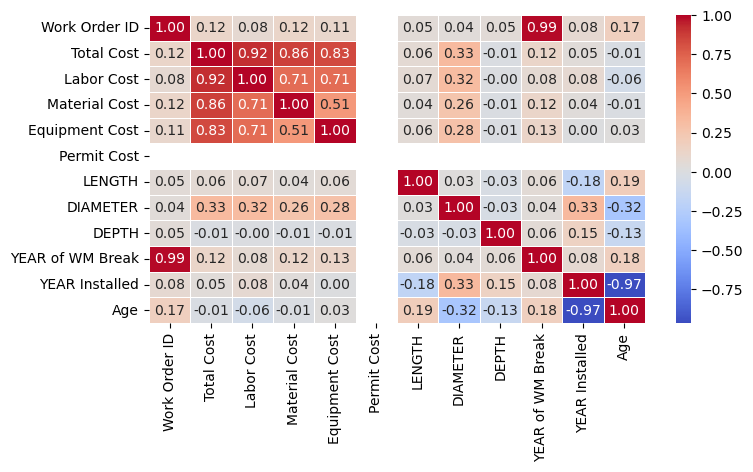

In [56]:
# created a heatmap to identify potential correlation between variables 

correlation_matrix = main_data.corr()

plt.figure(figsize=(8, 4))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

plt.show()

# Analysis:

## RQ #2: *Which pipe materials demonstrate the highest cost efficiency and sustainability in Ann Arbor's water main infrastructure, considering factors such as maintenance costs and durability?*

## Aggregating work order expenses by material: 

#### I want to see how labor, material, and equipment costs are related to watermain materials. This will help me gain a general understanding of what expenses are main contributors to the total cost of watermain repairs of different materials. 

In [12]:
# used groupby to show the all time sum of total Labor, Material, Equipment, and Total Cost of all work orders per watermain MATERIAL since 1950
main_break_expenses_sum = main_data.groupby('MATERIAL')['Labor Cost', 'Material Cost', 'Equipment Cost', 'Total Cost'].sum().fillna(0.0)

# the table shows the total costs since 1950
main_break_expenses_sum

/var/folders/0k/xs0rlfyd4_x_ft_xsh29q6jc0000gn/T/ipykernel_44661/3710535160.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  main_break_expenses_sum = main_data.groupby('MATERIAL')['Labor Cost', 'Material Cost', 'Equipment Cost', 'Total Cost'].sum().fillna(0.0)


,Labor Cost,Material Cost,Equipment Cost,Total Cost
MATERIAL,,,,
AC,690.20625,112.220000,278.9325,1.081359e+03
CI,446472.30750,198065.462083,526385.1250,1.170923e+06
DI,233312.50250,109691.984042,253302.4900,5.963070e+05
HDPE,0.00000,0.000000,0.0000,0.000000e+00
PVC,633.28500,249.015844,1444.3500,2.326651e+03
STL,3838.24000,650.730473,1935.2400,6.424210e+03


In [13]:
# used groupby to show the average Labor, Material, Equipment, and Total Cost of every work order per watermain MATERIAL
main_break_expenses_mean = main_data.groupby('MATERIAL')['Labor Cost', 'Material Cost', 'Equipment Cost', 'Total Cost'].mean().fillna(0.0)

# the table shows the mean costs since 1950
main_break_expenses_mean

/var/folders/0k/xs0rlfyd4_x_ft_xsh29q6jc0000gn/T/ipykernel_44661/4238598789.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  main_break_expenses_mean = main_data.groupby('MATERIAL')['Labor Cost', 'Material Cost', 'Equipment Cost', 'Total Cost'].mean().fillna(0.0)


,Labor Cost,Material Cost,Equipment Cost,Total Cost
MATERIAL,,,,
AC,690.206250,112.220000,278.932500,1081.358750
CI,1094.294871,485.454564,1290.159620,2869.908957
DI,1281.936827,602.703209,1391.771923,3276.411849
HDPE,0.000000,0.000000,0.000000,0.000000
PVC,633.285000,249.015844,1444.350000,2326.650844
STL,1919.120000,325.365237,967.620000,3212.105237


In [14]:
# Used groupby to show the average Labor, Material, Equipment, and Total Cost as percentages of the total cost to show impact on overal cost
main_break_expenses_mean_per = main_break_expenses_mean.div(main_break_expenses_mean['Total Cost'], axis=0) * 100

# The table shows the mean costs expressed as percentages since 1950
main_break_expenses_mean_per.fillna(0.0)

,Labor Cost,Material Cost,Equipment Cost,Total Cost
MATERIAL,,,,
AC,63.827684,10.377685,25.794631,100.0
CI,38.129951,16.915330,44.954723,100.0
DI,39.126242,18.395221,42.478540,100.0
HDPE,0.000000,0.000000,0.000000,0.0
PVC,27.218738,10.702759,62.078502,100.0
STL,59.746486,10.129345,30.124169,100.0


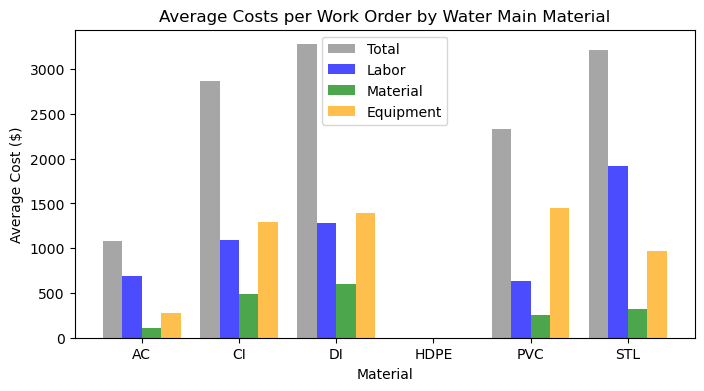

In [79]:
# created a grouped bar chart to display my previous findings

main_break_expenses_mean_reset = main_break_expenses_mean.reset_index()

fig, ax = plt.subplots(figsize=(8, 4))

bar_width = 0.2

ax.bar(main_break_expenses_mean_reset.index - 1.5 * bar_width, main_break_expenses_mean_reset['Total Cost'], width=bar_width, label='Total', color='gray', alpha=0.7)
ax.bar(main_break_expenses_mean_reset.index - 0.5 * bar_width, main_break_expenses_mean_reset['Labor Cost'], width=bar_width, label='Labor', color='blue', alpha=0.7)
ax.bar(main_break_expenses_mean_reset.index + 0.5 * bar_width, main_break_expenses_mean_reset['Material Cost'], width=bar_width, label='Material', color='green', alpha=0.7)
ax.bar(main_break_expenses_mean_reset.index + 1.5 * bar_width, main_break_expenses_mean_reset['Equipment Cost'], width=bar_width, label='Equipment', color='orange', alpha=0.7)

ax.set_title('Average Costs per Work Order by Water Main Material')
ax.set_xlabel('Material')
ax.set_ylabel('Average Cost ($)')
ax.set_xticks(main_break_expenses_mean_reset.index)
ax.set_xticklabels(main_break_expenses_mean_reset['MATERIAL'])
ax.legend()

plt.show()

#### This visual representation illustrates the average cost of each work order expenditure, offering a comprehensive overview of the contributions that play a pivotal role in the Total Cost and those that have less of an impact. A striking disparity emerges when comparing the total costs for the most commonly used materials—DI stands out with significantly higher total costs than CI. However, a nuanced perspective unfolds when we narrow our focus to material costs, revealing that DI is only marginally more expensive than CI in this specific expenditure category.

## Exploring the relationship between the cost of work order's and watermain age at the time of breakage:

#### I seek to uncover patterns related to the ages at which pipe materials commonly experience breakages and understand the associated repair costs incurred during watermain breaks.

In [16]:
# created a table to identify the frequencey of age pipe materials exerienced a break at. 
grouped_ages = main_data.groupby(['MATERIAL', 'Age']).size().reset_index(name='Count')
grouped_ages_sorted = grouped_ages.sort_values(by='Age', ascending= False)

grouped_ages_sorted

,MATERIAL,Age,Count
0,AC,73,1
25,CI,73,5
24,CI,72,24
23,CI,71,11
22,CI,70,10
...,...,...,...
29,DI,9,1
70,HDPE,9,1
28,DI,6,2
27,DI,5,1


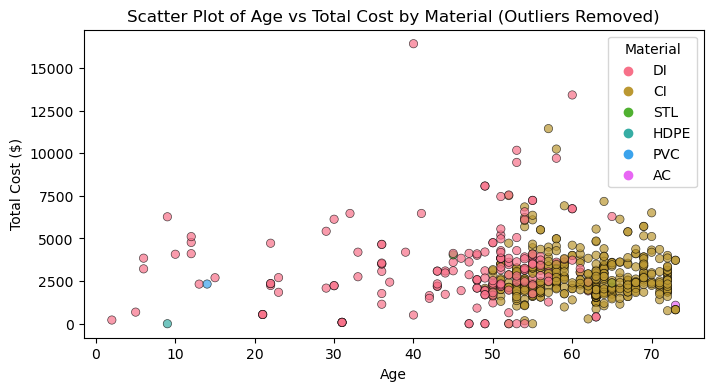

In [81]:
# there was one outlier with a total cost above over 40000. this made the plot hard to read, so i put a threshold in
cost_threshold = 40000
filtered_data = main_data[main_data['Total Cost'] <= cost_threshold]

# created a scatterplot to show age vs total cost of ever workorder
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Age', y='Total Cost', hue='MATERIAL', data=filtered_data, palette='husl', alpha=0.7, edgecolor='black')

plt.title('Scatter Plot of Age vs Total Cost by Material (Outliers Removed)')
plt.xlabel('Age')
plt.ylabel('Total Cost ($)')
plt.legend(title='Material')

plt.show()

#### The scatterplot highlights a concentration of CI pipe breaks typically occurring in the 50-70 years age range, accompanied by total costs ranging from $2000 to $5000. In contrast, when examining DI, the data points exhibit a more dispersed pattern. An estimated majority for DI pipe breaks might fall within the 40-55 years age bracket, accompanied by an average cost spanning from $1700 to $5000.

#### Regrettably, the scarcity of data points prevents drawing definitive conclusions about other materials.

In [35]:
# created a table to display the average age and the average total cost of watermain breaks
grouped_ages_mean = main_data.groupby('MATERIAL')['Age', 'Total Cost'].mean().reset_index()

# made a ratio to measure cost efficency of pipe materials over their lifespan 
grouped_ages_mean['Cost/Age Ratio'] = grouped_ages_mean['Total Cost'] / grouped_ages_mean['Age']

grouped_ages_mean

/var/folders/0k/xs0rlfyd4_x_ft_xsh29q6jc0000gn/T/ipykernel_44661/221456123.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_ages_mean = main_data.groupby('MATERIAL')['Age', 'Total Cost'].mean().reset_index()


,MATERIAL,Age,Total Cost,Cost/Age Ratio
0,AC,73.000000,1081.358750,14.813134
1,CI,61.583333,2869.908957,46.602040
2,DI,45.500000,3276.411849,72.009052
3,HDPE,9.000000,0.000000,0.000000
4,PVC,14.000000,2326.650844,166.189346
5,STL,55.000000,3212.105237,58.401913



#### Viewing the data from a different perspective, the Cost/Age Ratio unveils an insightful metric. It indicates the annual expenditure, on average, for each year of a water main's age before requiring replacement or maintenance. For instance, a Cost/Age Ratio of $46.60 would imply an expenditure of approximately $46.60 every year for each year of the water main's lifespan. This metric serves as a valuable measure of cost efficiency across different pipe materials, shedding light on how effectively resources are allocated relative to the age and durability of the infrastructure.

## Measuring the average cost of watermain break maintenance over the years: 

#### This analysis aims to examine the historical shifts in water main maintenance costs per pipe material, focusing on trends since the 1950s. The goal is to discern patterns in average pricing, providing valuable insights into the evolving landscape of repair costs over the years and potentially the future.

In [58]:
# created a table to show the average annual cost of watermain repairs per material
yearly_cost_table = pd.pivot_table(main_data, values='Total Cost', index='YEAR of WM Break', columns='MATERIAL', aggfunc='mean').fillna(0.0)

yearly_cost_table

MATERIAL,AC,CI,DI,HDPE,PVC,STL
YEAR of WM Break,,,,,,
2012,0.00000,0.000000,3217.020000,0.0,0.000000,0.000000
2013,0.00000,2324.331129,2863.671500,0.0,0.000000,0.000000
2014,0.00000,2730.126607,2886.291600,0.0,0.000000,0.000000
2015,0.00000,2760.863256,2858.673456,0.0,0.000000,3212.105237
2016,0.00000,2465.081080,3353.504471,0.0,0.000000,0.000000
2017,0.00000,3034.443434,1945.386125,0.0,0.000000,0.000000
2018,0.00000,2975.553264,2629.005851,0.0,2326.650844,0.000000
2019,0.00000,3060.928757,5110.173904,0.0,0.000000,0.000000
2020,0.00000,3581.663054,3853.298641,0.0,0.000000,0.000000


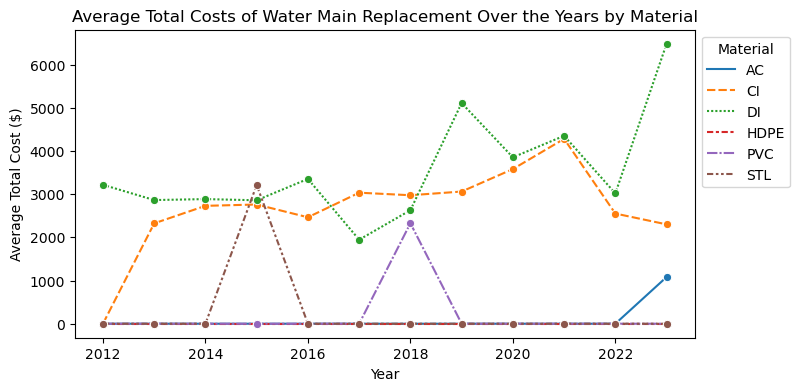

In [61]:
# created a line chart to visualize my table results
plt.figure(figsize=(8, 4))

sns.lineplot(data=yearly_cost_table, marker='o')

plt.title('Average Total Costs of Water Main Replacement Over the Years by Material')
plt.xlabel('Year')
plt.ylabel('Average Total Cost ($)')
plt.legend(title='Material', bbox_to_anchor=(1, 1))

plt.show()

#### This line graph holds significance as it illuminates trends in water main repair costs dating back to 2012. Unfortunately, due to data limitations, our examination is confined to materials CI and DI. Within these materials, distinct patterns emerge in the total average costs of water main repairs. Notably, over the observed period, replacement expenses for CI pipes consistently trended lower than those for DI. Of particular interest is the current trajectory: while DI average repair costs are on an upward trend, CI costs are on a downward trajectory. This observation offers valuable insights into potential future costs associated with these pipe repairs.

In [78]:
# created the same table as the previous table, but focused on Material Cost compared to Total Cost.
yearly_material_cost_table = pd.pivot_table(main_data, values='Material Cost', index='YEAR of WM Break', columns='MATERIAL', aggfunc='mean').fillna(0.0)

yearly_material_cost_table

MATERIAL,AC,CI,DI,HDPE,PVC,STL
YEAR of WM Break,,,,,,
2012,0.00,0.000000,438.900000,0.0,0.000000,0.000000
2013,0.00,318.326774,391.440000,0.0,0.000000,0.000000
2014,0.00,342.280893,375.806800,0.0,0.000000,0.000000
2015,0.00,797.252558,663.341717,0.0,0.000000,325.365237
2016,0.00,323.513483,371.773951,0.0,0.000000,0.000000
2017,0.00,423.571919,231.244667,0.0,0.000000,0.000000
2018,0.00,335.825831,439.642689,0.0,249.015844,0.000000
2019,0.00,422.026840,1317.203154,0.0,0.000000,0.000000
2020,0.00,569.766117,768.275454,0.0,0.000000,0.000000


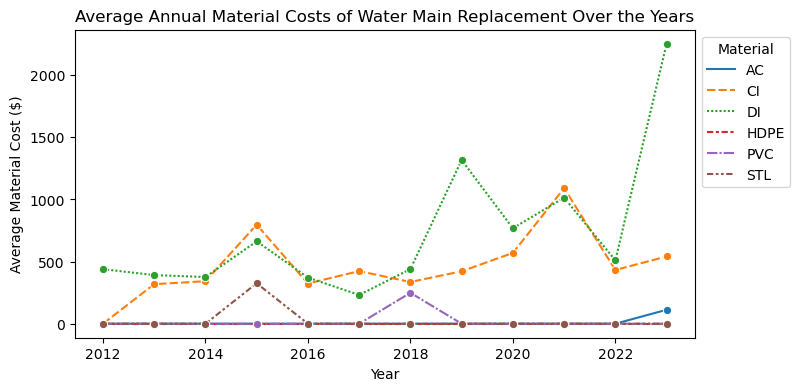

In [63]:
# created a line chart to visualize my table results
plt.figure(figsize=(8, 4))

sns.lineplot(data=yearly_material_cost_table, marker='o')

plt.title('Average Annual Material Costs of Water Main Replacement Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Material Cost ($)')
plt.legend(title='Material', bbox_to_anchor=(1, 1))

plt.show()

#### I found it intriguing to focus specifically on Material Costs per work order. This chart provides a visual narrative of the evolving landscape of material prices across the years. Notably, both CI and DI exhibit a subtle upward trend over time. However, a distinctive shift becomes apparent from 2018 onward—DI, in relative terms, has become comparatively more expensive than CI and is exhibiting a steeper upward trajectory.

## Diving Deeper, Exploring the relationship between pipe diameter and work order expenses: 

#### Last, revisiting my correlation heatmap, I observed a slight association between pipe diameter and costs. While the explanation might seem self-evident (larger pipes generally incurring higher costs), I sought to delve deeper, exploring the possibility of uncovering any hidden correlations that might elude casual observation.

In [76]:
# did a value_count on diameter to get an undertanding of what pipe diameters experience a watermain break.
diameter_count = main_data['DIAMETER'].value_counts().reset_index()

# converted results to a percentage
diameter_count["% of all pipe materials"] = (diameter_count['DIAMETER'] / main_data['DIAMETER'].count()) * 100

diameter_count

,index,DIAMETER,% of all pipe materials
0,6.00,340,57.142857
1,8.00,119,20.000000
2,12.00,60,10.084034
3,4.00,30,5.042017
4,16.00,22,3.697479
5,20.00,8,1.344538
6,10.00,8,1.344538
7,3.00,4,0.672269
8,2.00,2,0.336134
9,2.25,2,0.336134


In [73]:
# made a table that shows the average cost of material by diameter 
diameter_cost_table = pd.pivot_table(main_data, values='Material Cost', index='DIAMETER', columns='MATERIAL', aggfunc='mean')

# showed the change in CI and DI average price per diameter to determine which pipe was more affordable
diameter_cost_table['Price Change DI-CI'] = diameter_cost_table['DI'] - diameter_cost_table['CI']

diameter_cost_table

MATERIAL,AC,CI,DI,HDPE,PVC,STL,Price Change DI-CI
DIAMETER,,,,,,,
2.00,NaN,0.000000,130.600000,NaN,NaN,NaN,130.600000
2.25,NaN,240.820000,NaN,NaN,NaN,NaN,NaN
3.00,NaN,120.230000,NaN,NaN,NaN,NaN,NaN
4.00,NaN,335.630428,336.664748,NaN,NaN,NaN,1.034321
6.00,NaN,437.428804,542.936428,NaN,NaN,NaN,105.507624
8.00,112.22,415.399716,554.924201,NaN,249.015844,NaN,139.524485
10.00,NaN,NaN,268.222437,NaN,NaN,NaN,NaN
12.00,NaN,498.809453,564.018861,NaN,NaN,325.365237,65.209408
16.00,NaN,912.793566,1243.572655,0.0,NaN,NaN,330.779090


#### These tables offer a wealth of insights. In revisiting my RQ1 analysis, I uncovered that the prevailing pipe diameter is 8.0, closely trailed by 12.0 and 6.0. Delving into the details from the first table, a distinctive trend comes to light—despite their lower frequency in usage, 6.0 pipes significantly contribute to water main breaks, surpassing both 8.0 and 12.0. This intriguing revelation suggests that, despite their lesser prevalence, 6.0 pipes exhibit a notable lack of durability.

#### Furthermore, examining the second table unveils a compelling pattern. For the top three most frequently employed pipe diameters, CI stands out as notably more cost-effective across all diameter categories. This observation underscores the economic advantage of CI, even when considering the most commonly utilized pipe sizes. 